## Testing BARTTSAgent with a Simulation

In this notebook we define a simple scenario (LinearScenario) and a simulation function. The simulation runs a loop over several rounds (draws) in which, at each round, the scenario generates covariates and rewards. Each agent (here a BARTTSAgent) selects an arm based on its current state, the cumulative regret is updated, and the agent’s state is updated with the observed reward.

In [1]:

import matplotlib.pyplot as plt

from bart_playground.bandit.agents.bart_agent import LogisticBARTAgent, DefaultBARTAgent
from bart_playground.bandit.experiment_utils.sim_util import *

from bart_playground.bandit.baseline_wrappers.TEagents import TEAgent

### Running the Simulation
 
In this example, we set up a scenario with a given number of arms and features, create a BARTTSAgent (or BCFAgent), run the simulation for a fixed number of draws, and then plot the cumulative regret over time.

In [2]:
# Simulation parameters
n_draws = 300

scenario = OpenMLScenario(random_generator=0, dataset = 'adult')

agent = LogisticBARTAgent(n_arms=scenario.K, n_features=scenario.P, nskip=20, ndpost=20,nadd=1,
                          n_trees=50, encoding='one-hot')
agent0 = TEAgent(n_arms=scenario.K, n_features=scenario.P, agent_type='xgboost')
agent1 = TEAgent(n_arms=scenario.K, n_features=scenario.P, agent_type='random_forest')
agent_d = DefaultBARTAgent(n_arms=scenario.K, n_features=scenario.P, n_trees=50, nskip=20, ndpost=20)

from bart_playground.bandit.agents.refresh_agent import RefreshDefaultBARTAgent
agent2 = RefreshDefaultBARTAgent(n_arms=scenario.K, n_features=scenario.P, n_trees=50, nskip=200, ndpost=800)

agents = [agent, agent0, agent1, agent_d, agent2]
agent_names = ['LogisticBART', 'XGBoostTS', 'RandomForest-TS', 
               'DefaultBART', 'RefreshDefaultBART']

Random Forest parameters - exploration_variance: 1.0 n_estimators: 100


In [3]:

# Run the simulation.
# Define a helper that calls simulate() once and stores the result.
def run_simulation():
    global simulation_result
    simulation_result = simulate(scenario, agents, n_draws=n_draws, agent_names=agent_names)
    return simulation_result

_ = run_simulation()

Simulating:   0%|          | 0/300 [00:00<?, ?it/s]

Fitting initial BART model with first 4 observation(s)... Done.
Fitting initial BART model with first 4 observation(s)...

Simulating:   1%|▏         | 4/300 [00:02<03:18,  1.49it/s]

 Done.


Simulating:   2%|▏         | 5/300 [00:03<03:07,  1.57it/s]INFO:root:t = 10 - re-trained model
INFO:root:t = 10 - re-trained model
Simulating:   3%|▎         | 9/300 [00:05<02:41,  1.81it/s]INFO:root:t = 11 - re-trained model
INFO:root:t = 11 - re-trained model
INFO:root:t = 10 - re-training BART model from scratch
Simulating:   4%|▎         | 11/300 [00:13<08:29,  1.76s/it]INFO:root:t = 13 - re-trained model
INFO:root:t = 13 - re-trained model
Simulating:   4%|▍         | 12/300 [00:14<07:54,  1.65s/it]INFO:root:t = 14 - re-trained model
INFO:root:t = 14 - re-trained model
INFO:root:t = 13 - re-training BART model from scratch
Simulating:   5%|▍         | 14/300 [00:25<14:52,  3.12s/it]INFO:root:t = 16 - re-trained model
INFO:root:t = 16 - re-trained model
Simulating:   5%|▌         | 16/300 [00:29<13:30,  2.85s/it]INFO:root:t = 18 - re-trained model
INFO:root:t = 18 - re-trained model
Simulating:   6%|▌         | 18/300 [00:38<16:49,  3.58s/it]INFO:root:t = 21 - re-trained model
INFO

In [4]:
# %prun -s cumtime -D profile_bandit.prof -q run_simulation()
# !gprof2dot -f pstats profile_bandit.prof -o profile_bandit.dot
# !dot -Tpng profile_bandit.dot -o profile_bandit.png

### Plotting the Results

We plot the cumulative regret over simulation draws.

In [5]:
cum_regrets, time_agent = simulation_result

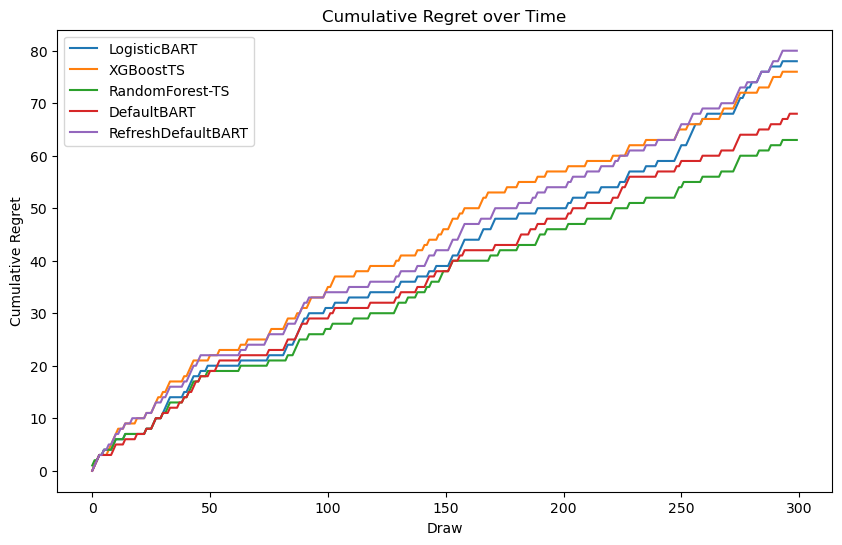

Agent computation times (seconds): [[1.18017197e-04 1.76906586e-04 8.63075256e-05 4.36306000e-05
  3.81469727e-05]
 [4.19616699e-05 9.89437103e-05 9.60826874e-05 5.91278076e-05
  3.21865082e-05]
 [4.12464142e-05 8.60691071e-05 7.05718994e-05 3.29017639e-05
  2.67028809e-05]
 ...
 [1.24816895e-02 4.10587788e-02 1.32553577e-02 9.73224640e-03
  4.80175018e-04]
 [1.16262436e-02 6.25679493e-02 1.29542351e-02 1.03483200e-02
  4.68730927e-04]
 [1.18219852e-02 3.14048290e-01 1.36849880e-02 1.10204220e-02
  5.39541245e-04]]


In [6]:

plt.figure(figsize=(10, 6))
for i, agent in enumerate(agents):
    plt.plot(cum_regrets[:, i], label=agent_names[i])
plt.xlabel("Draw")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret over Time")
plt.legend()
plt.show()

print("Agent computation times (seconds):", time_agent)